# Class 101

**Performing Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd
import glob
from datetime import datetime
import re
import numpy as np
import math
import os

## Data Preparation

We combine the csv files into one dataframe and export it as a file using the code below

In [2]:
#combining csv files into one dataframe

folderDir = "/Users/CheHoon/Desktop/Class101DataFinal"

df = pd.DataFrame()

files = glob.glob(f"{folderDir}/*.csv")

for f in files:
    csv = pd.read_csv(f)
    df = df.append(csv)

    
todayDate = "20210611"
df.to_csv(f"/Users/CheHoon/Desktop/Class101DataFinal/class101_{todayDate}.csv")
    

*We clean the data using R Studio instead for convenience (Refer to R File).*

We import the clean data into this notebook for analysis.

In [2]:
classdf = pd.read_excel(os.path.join(os.getcwd(),"Data","Class101DataClean.xlsx"))

In [3]:
classdf.head()

,className,category,topic,level,duration,chapters,lessons,startDate,subtitles,creatorName,...,originalPrice,discountAmount,couponDiscount,finalPrice,installmentPeriodInMonths,discountPct,monthlyPayment,coupon,referenceDate,classURL
0,"월간키키 1호 : 몸도 튼튼, 마음도 튼튼",아동교육,NaN,NaN,12주 수강 가능,0.0,0.0,바로 수강 가능,False,클래스101 키즈,...,162550.0,63550.0,NaN,99000.0,NaN,39.0,NaN,NaN,2021-06-10,https://class101.net/products/TCFyXX6He5cWP3xL...
1,"직접 만들며 배우는 코딩, 나만의 장난감 5개 만들기!",아동교육,피지컬 코딩 / 아두이노,입문자,21주 수강 가능,6.0,27.0,바로 수강 가능,False,ACIA 김수연,...,388300.0,68800.0,NaN,NaN,5.0,17.0,63900.0,NaN,2021-06-10,https://class101.net/products/SXP7pjCrXulA9fQS...
2,"""로봇은 어떻게 움직여요?"" 아이 질문에 페이퍼토이로 답해주기",아동교육,로봇 하드웨어/소프트웨어 교육,입문자,20주 수강 가능,13.0,30.0,바로 수강 가능,True,로보트리,...,309400.0,79900.0,NaN,NaN,5.0,25.0,45900.0,NaN,2021-06-10,https://class101.net/products/xXZcIpnsa4zaGato...
3,아이의 미래를 바꾼다! 주식으로 이해하는 어린이 경제 클래스,아동교육,NaN,NaN,12주 수강 가능,NaN,NaN,NaN,NaN,NaN,...,69000.0,10000.0,NaN,59000.0,NaN,14.0,NaN,NaN,2021-06-10,https://class101.net/products/yWb00UZQ5AP2NkPl...
4,재료 선정부터 디지털 포스터까지! : 곤충을 테마로 탐구하는 진짜 융합 미술,아동교육,NaN,NaN,20주 수강 가능,8.0,29.0,21.07.06 (화),False,Re:a 레아,...,280000.0,110700.0,10000.0,159300.0,5.0,43.0,31860.0,NaN,2021-06-10,https://class101.net/products/ezwV5FutQUK2CCEs...


In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
df = classdf.copy()

## Average Statistics

### Satisfaction

In [6]:
satisfaction = df.loc[~df['satisfactionPct'].isna(),]
print("Average satisfaction percentage: ",satisfaction['satisfactionPct'].mean())

Average satisfaction percentage:  96.66889632107024


### Duration

In [7]:
duration = df.groupby('duration')
duration_df = duration.agg({'likes':['mean', 'median'], 'satisfactionPct':['mean','median'], 'className':'count'})
duration_df.sort_values(by=[('likes','mean')], ascending=False)

likes          satisfactionPct        className
                   mean   median            mean median     count
duration                                                         
25주 수강 가능  12184.000000  12184.0       98.000000   98.0         2
16주 수강 가능   3567.120000   3099.0       95.734694   97.0       100
22주 수강 가능   2594.333333   2369.0       95.666667   96.0         6
24주 수강 가능   2020.851852   1272.0       98.052632   99.0        54
20주 수강 가능   2011.508464   1061.0       96.714286   98.0      3190
3년 수강 가능    1679.400000   1322.0             NaN    NaN        10
32주 수강 가능   1417.500000   1417.5       98.000000   98.0         4
26주 수강 가능   1139.000000   1139.0       98.000000   98.0         2
30주 수강 가능    976.000000    976.0       98.000000   98.0         2
21주 수강 가능    908.000000    724.0       96.000000   98.0         6
38주 수강 가능    873.000000    873.0             NaN    NaN         2
14주 수강 가능    698.000000    629.0       96.000000   98.0         6
1년 수강 가능     654.126050    353.0       97.800000   98.0       238
12주 수강 가능    602.861386     68.0       97.906250   98.0       202
28주 수강 가능    565.000000    565.0      100.000000  100.0         2
40주 수강 가능    454.333333    505.0       98.000000   98.0         6
8주 수강 가능     410.727273    138.0       96.666667   96.0        22
2년 수강 가능     394.250000    328.0             NaN    NaN         8
48주 수강 가능    220.047619    151.0       98.500000   99.0        42
1주 수강 가능     149.625000    163.5             NaN    NaN        16
2주 수강 가능      62.500000     62.5             NaN    NaN         4
4주 수강 가능      61.565789     36.0       95.035714   96.0       152
무제한           37.400000     27.0             NaN    NaN        20

### Difficulty

In [8]:
difficulty = df.loc[~df['level'].isna()]
difficulty = difficulty.groupby('level')
difficulty_df = difficulty.agg({'className':'count', 'likes':['mean','median'], 'finalPrice':['mean','median'],'satisfactionPct':['mean','std']})

difficulty_df


className        likes             finalPrice           satisfactionPct  \
          count         mean  median           mean    median            mean   
level                                                                           
입문자        2100  1964.847619  1047.5  205663.473275  186089.0       96.427492   
전문가           4   898.500000   898.5  193750.000000  193750.0             NaN   
중급자         158  1448.746835   810.0  232741.658824  218200.0       96.950000   
초급자        1662  1692.700361   844.0  222940.247286  200000.0       97.016667   

                 
            std  
level            
입문자    3.432542  
전문가         NaN  
중급자    3.557485  
초급자    3.474881

### Lesson Number

In [9]:
print("Average number of lessons per class: ", df['lessons'].mean())

Average number of lessons per class:  32.22390243902439


## Monthly Price Analysis

In [10]:
dfs = df.copy()
dfs = dfs.drop([1795, 1916,2334,3254,3375,3793],axis=0)

df.loc[df['originalPrice'] < df['discountAmount']]

,className,category,topic,level,duration,chapters,lessons,startDate,subtitles,creatorName,...,originalPrice,discountAmount,couponDiscount,finalPrice,installmentPeriodInMonths,discountPct,monthlyPayment,coupon,referenceDate,classURL
1795,[클래스101 튜토리얼] 코바늘이 처음인 당신을 위해,코바늘뜨개,코바늘,입문자,48주 수강 가능,4.0,10.0,바로 수강 가능,False,클래스101,...,12601.0,40000.0,NaN,-27399.0,NaN,317.0,NaN,NaN,2021-06-09,https://class101.net/products/tq0f5N51oXsFgwVU...
1916,[클래스101 튜토리얼] 대바늘이 처음인 당신을 위해,대바늘뜨개,대바늘,입문자,48주 수강 가능,4.0,9.0,바로 수강 가능,True,클래스101,...,101.0,40000.0,NaN,-39899.0,NaN,39603.0,NaN,NaN,2021-06-09,https://class101.net/products/DMqhqLv0AHfby3UW...
2334,[클래스101 튜토리얼] 프랑스자수가 처음인 당신을 위해,실공예,프랑스자수,입문자,48주 수강 가능,4.0,6.0,바로 수강 가능,True,클래스101,...,101.0,40000.0,NaN,-39899.0,NaN,39603.0,NaN,NaN,2021-06-09,https://class101.net/products/dTZOgJBN00KZrOrb...
3254,[클래스101 튜토리얼] 코바늘이 처음인 당신을 위해,코바늘뜨개,코바늘,입문자,48주 수강 가능,4.0,10.0,바로 수강 가능,False,클래스101,...,12601.0,40000.0,NaN,-27399.0,NaN,317.0,NaN,NaN,2021-06-09,https://class101.net/products/tq0f5N51oXsFgwVU...
3375,[클래스101 튜토리얼] 대바늘이 처음인 당신을 위해,대바늘뜨개,대바늘,입문자,48주 수강 가능,4.0,9.0,바로 수강 가능,True,클래스101,...,101.0,40000.0,NaN,-39899.0,NaN,39603.0,NaN,NaN,2021-06-09,https://class101.net/products/DMqhqLv0AHfby3UW...
3793,[클래스101 튜토리얼] 프랑스자수가 처음인 당신을 위해,실공예,프랑스자수,입문자,48주 수강 가능,4.0,6.0,바로 수강 가능,True,클래스101,...,101.0,40000.0,NaN,-39899.0,NaN,39603.0,NaN,NaN,2021-06-09,https://class101.net/products/dTZOgJBN00KZrOrb...


In [11]:
category = []

for row in dfs['monthlyPayment'].iteritems():
    if row[1] < 10000:
        category.append('0만원대')
    elif row[1] < 20000:
        category.append("1만원대")
    elif row[1] < 30000:
        category.append("2만원대")
    elif row[1] < 40000:
        category.append("3만원대")
    elif row[1] < 50000:
        category.append("4만원대")
    elif row[1] < 60000:
        category.append("5만원대")
    elif row[1] < 70000:
        category.append("6만원대")
    elif row[1] < 80000:
        category.append("7만원대")
    elif row[1] < 90000:
        category.append("8만원대")
    elif row[1] < 100000:
        category.append("9만원대")
    elif row[1] < 200000:
        category.append("10만원대")
    else:
        category.append("20만원대 이상")

dfs['priceCategory'] = category
dfsGroup = dfs.groupby('priceCategory').agg({'likes':['mean', 'median'], 'satisfactionPct':['mean','median'], 'className':'count'}) 
dfsGroup = dfsGroup.reset_index()

dfsGroup2 = dfsGroup.loc[dfsGroup[('className','count')]>=100]
dfsGroup2.sort_values(by=[('likes','mean')], ascending = False)


priceCategory        likes         satisfactionPct        className
                        mean  median            mean median     count
6          4만원대  2195.400000  1215.0       97.003922   98.0       790
5          3만원대  2102.210016  1169.0       96.572581   98.0      1238
4          2만원대  1948.991549   884.0       96.102804   97.0       710
7          5만원대  1792.602804   907.5       96.933333   98.0       428
9          7만원대  1551.516129  1015.5       97.432432   98.0       124
8          6만원대  1309.949153   873.0       97.878378   99.0       236
2          1만원대  1262.767857   437.0       95.434783   98.0       112
3      20만원대 이상   203.234694    47.0       95.787500   97.0       394

In [12]:
dfsGroup2.sort_values(by=[('likes','median')], ascending = False)

priceCategory        likes         satisfactionPct        className
                        mean  median            mean median     count
6          4만원대  2195.400000  1215.0       97.003922   98.0       790
5          3만원대  2102.210016  1169.0       96.572581   98.0      1238
9          7만원대  1551.516129  1015.5       97.432432   98.0       124
7          5만원대  1792.602804   907.5       96.933333   98.0       428
4          2만원대  1948.991549   884.0       96.102804   97.0       710
8          6만원대  1309.949153   873.0       97.878378   99.0       236
2          1만원대  1262.767857   437.0       95.434783   98.0       112
3      20만원대 이상   203.234694    47.0       95.787500   97.0       394

## Coupon Analysis

In [13]:
df.loc[df['coupon'] == '준비물 무료']
df.iloc[1257, df.columns.get_loc('coupon')] = "준비물0원"
df.iloc[2716, df.columns.get_loc('coupon')] = "준비물0원"

In [14]:
couponGroup = df.groupby('coupon')
coupon_df = couponGroup.agg({'likes':['mean','median'], 'satisfactionPct':['mean','median'], 'className':'count'})

coupon_df2 = coupon_df.loc[coupon_df[('className','count')]>=50]

coupon_df2.sort_values(by = ('likes', 'mean'), ascending = False)



likes         satisfactionPct        className
                mean  median            mean median     count
coupon                                                       
준비물0원    4209.200000  2286.0       97.448980   98.0       110
5만원 쿠폰   3331.521739  1986.0       97.254545   98.0       690
4만원 쿠폰   2769.291667  1556.5       97.435897   98.0        96
3만원 쿠폰   1554.579839   922.0       96.358548   97.0      2242
1개월 무제한    32.046512    27.0       94.666667   96.0        86

Classes without coupons:  620
Classes with coupons:  3546


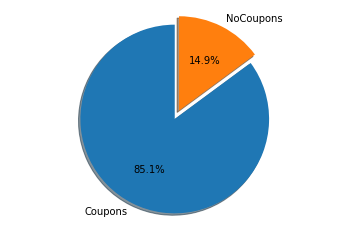

In [15]:
withoutCoupon = df.loc[df['coupon'].isna()].shape[0]
withCoupon = df.loc[~df['coupon'].isna()].shape[0]

print("Classes without coupons: ",withoutCoupon)
print("Classes with coupons: ",withCoupon)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Coupons', 'NoCoupons'
sizes = [withCoupon, withoutCoupon]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [16]:
print("number of likes of class without coupons: ", df.loc[df['coupon'].isna()]['likes'].mean())
print("number of likes of class with coupons: ", df.loc[~df['coupon'].isna()]['likes'].mean())


number of likes of class without coupons:  340.6862745098039
number of likes of class with coupons:  2036.1454753722794


## Exploring Creator Social Media Information

In [17]:
import requests
import json
from urllib3.exceptions import HTTPError

We load the socialmedia file

In [18]:
socialdf = pd.read_excel(os.path.join(os.getcwd(),"Data","Class101CreatorSocialMedia.xlsx"))

### Youtube Data Acquisition

We read the YoutubeData API Key from the apikey json file

In [19]:
with open('/Users/CheHoon/cheprojects/class101/myapi.json', 'r') as f:
    apifile = json.load(f)

myAPIKey = apifile['apikey']

We find the total number of youtube accounts and instagram accounts below

In [20]:
youtubeCount = 0
instagramCount = 0
YTChannels = []

for row in socialdf['creatorSocialMedia'].iteritems():
    if "youtube" in row[1]:
        youtubeCount += 1
        YTChannels.append(row[1])
    if "instagram" in row[1]:
        instagramCount += 1
    
print("youtube: ", youtubeCount)
print("instagram: ", instagramCount)

youtube:  603
instagram:  1310


We define a few functions that extracts the user ids below

In [21]:
def extractIndexes(url, slashNum):
    '''
    Helper function. Returns the start and end indexes of userIDs from URL.
    '''
    slash = 0
    start = 0
    startBool = True
    end = 0
    
    for i, v in enumerate(url):
        if v == '/':
            slash += 1
        if slash == slashNum and startBool:
            start = i
            startBool = False
        if v == '/' and slash > slashNum:
            end = i
            return start, end
        if v == '&' or v == '?':
            end = i
            return start, end
    
    return start, end
    

def extractIDs(urlList):
    '''
    Given list of social media urls, extracts and returns list of user ids.
    '''
    IDList = []
    
    for url in urlList:
    
        if "youtube.com/channel/" in url or "youtube.com/c/" in url or "youtube.com/user/" in url:
            
            start, end = extractIndexes(url,4)
            
            if end == 0:
                IDList.append(url[start+1:])
                
            else:
                IDList.append(url[start+1:end])
                
        else:
            
            start, end = extractIndexes(url,3)
            
            if end == 0:
                IDList.append(url[start+1:])
            else:
                IDList.append(url[start+1:end])
    
    return IDList

We define a function that performs API requests to the YoutubeDataAPI, and retrieve information about the view counts, number of subscribers, and number of videos of each channel. The function exports a json file of the accumulated information

In [22]:
def getYoutubeSubscribers(IDList, myAPIKey, directoryPath=os.getcwd(), filename = "youtubedata.json"):
    '''
    Exports json file of youtube subscriber data. Uses YoutubeDataAPI v3.
    '''
    jsonInfo = {'data':[]}
    
    for creatorID in IDList:

        try:
            url = f"https://youtube.googleapis.com/youtube/v3/channels?part=statistics&id={creatorID}&key={myAPIKey}"
            response = requests.get(url)
            ytjson = response.json()
            if 'items' in ytjson:
                jsonInfo['data'].append({'creatorID':creatorID, 'stats':ytjson['items'][0]['statistics']})

        except HTTPError as e:
            print("HTTP Error Detected")

    with open(f"{directoryPath}/{filename}",'w') as f:
        json.dump(jsonInfo, f)
    

We invoke the `getYoutubeSubscribers` function below.
Function commented after invoked once. Uncomment to run.

In [23]:
#getYoutubeSubscribers(IDList, myAPIKey,os.path.join(os.getcwd(),"Data"))

We define a function `readYoutubeJson` that reads in the json file that contains youtube data

In [24]:
def readYoutubeJson(directoryPath=os.getcwd(), filename="youtubedata.json"):
    
    with open(f"{directoryPath}/{filename}", 'r') as f:
        jsonData = json.load(f)
    
    return jsonData

We read the youtubejson file using the `readYoutubeJson` function

In [25]:
ytjson = readYoutubeJson(os.path.join(os.getcwd(),"Data"))

In [26]:
#construct total dataframe
youtube_df = pd.DataFrame(columns = ['creatorID', 'YoutubeSubscribers', 'YoutubeViews', 'YoutubeVideos'])

#loop through json data and append each youtube data to total dataframe
for element in ytjson['data']:
    creatorID = element['creatorID']
    views = element['stats']['viewCount']
    videos = element['stats']['videoCount']
    if element['stats']['hiddenSubscriberCount'] == False:
        subscribers = element['stats']['subscriberCount']
    else:
        subscribers = None
    
    rowdf = pd.DataFrame({'creatorID':[creatorID], 'YoutubeSubscribers':[subscribers],'YoutubeViews':[views],'YoutubeVideos':[videos]})
    
    youtube_df = youtube_df.append(rowdf)


In [27]:
#get list of creator ids
creatorIDs = extractIDs(socialdf['creatorSocialMedia'])
#append creatorID column to dataframe
socialdf['creatorID'] = creatorIDs

socialdf = socialdf.merge(youtube_df, on='creatorID', how='left')

#rearranging column order
socialdf = socialdf[['creatorID', 'creatorName','creatorSocialMedia','YoutubeSubscribers','YoutubeViews','YoutubeVideos']]

#renaming creatorSocialMedia column
socialdf = socialdf.rename(columns={'creatorSocialMedia':'socialMediaURL'})

In [28]:
#socialdf.to_csv(os.path.join(os.getcwd(),"Data","SocialMediaData.csv"))

### Analyze Social Media Data

In [29]:
socialdf2 = pd.read_csv(os.path.join(os.getcwd(),"Data","SocialMediaData.csv"))

In [30]:
socialdf2

,Unnamed: 0,creatorID,creatorName,socialMediaURL,YoutubeSubscribers,YoutubeViews,YoutubeVideos
0,0,UCoyA-0efbgYY7GAAvrRH0ZA,[대박땅꾼] 전은규,https://www.youtube.com/channel/UCoyA-0efbgYY7...,68300.0,3263655.0,244.0
1,1,125_yu.nim,125,http://instagram.com/125_yu.nim,NaN,NaN,NaN
2,2,3am_sesi,12DOSTUDIO(세시),https://instagram.com/3am_sesi,NaN,NaN,NaN
3,3,14.day,14일,https://instagram.com/14.day,NaN,NaN,NaN
4,4,akqjatk12,1억치트키,https://cafe.naver.com/akqjatk12,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2634,2634,eesppt,ㅔㅔㅅ,https://www.facebook.com/eesppt,NaN,NaN,NaN
2635,2635,eesppt,ㅔㅔㅅ,https://www.pinterest.co.kr/eesppt/,NaN,NaN,NaN
2636,2636,UCkk7Lu7gKcXKl9BAru13PNA,ㅔㅔㅅ,https://www.youtube.com/channel/UCkk7Lu7gKcXKl...,4890.0,246928.0,28.0
2637,2637,UCPWhB4mA6xaopNTrwo_HKLw,興하게 도와드리는 흥소장,https://www.youtube.com/channel/UCPWhB4mA6xaop...,4640.0,157235.0,156.0


In [31]:
ytSubscribers = socialdf2.loc[~socialdf2['YoutubeSubscribers'].isna()]

bronze = ytSubscribers.loc[ytSubscribers['YoutubeSubscribers'] >= 10000]
silver = ytSubscribers.loc[ytSubscribers['YoutubeSubscribers'] >= 100000]
gold = ytSubscribers.loc[ytSubscribers['YoutubeSubscribers'] >= 1000000]
print("Creators with bronze play button: ", bronze.shape[0])
print("Creators with silver play button: ", silver.shape[0])
print("Creators with gold play button: ", gold.shape[0])

Creators with bronze play button:  163
Creators with silver play button:  62
Creators with gold play button:  2


In [32]:
#ytSubscribers = ytSubscribers.drop(['index','level_0'], axis=1)

In [33]:
ytSubscribers = ytSubscribers.drop(['Unnamed: 0'], axis = 1)

In [34]:
ytSubscribers = ytSubscribers.merge(df, on=['creatorName'])

In [35]:
ytSubscribers = ytSubscribers.drop_duplicates()
ytSubscribers = ytSubscribers.reset_index()
ytSubscribers

,index,creatorID,creatorName,socialMediaURL,YoutubeSubscribers,YoutubeViews,YoutubeVideos,className,category,topic,...,originalPrice,discountAmount,couponDiscount,finalPrice,installmentPeriodInMonths,discountPct,monthlyPayment,coupon,referenceDate,classURL
0,0,UCoyA-0efbgYY7GAAvrRH0ZA,[대박땅꾼] 전은규,https://www.youtube.com/channel/UCoyA-0efbgYY7...,68300.0,3263655.0,244.0,이제는 아파트보다 토지! 토지 투자로 월세 천 만원 받는 법,재태크,초보자들을 위한 토지 입문 강의,...,339000.0,60000.0,50000.0,229000.0,5.0,32.0,45800.0,NaN,2021-06-10,https://class101.net/products/Y7x3Kza8WLNHrHpW...
1,2,UCotiBSGv8a064wPti8tlUEA,1프로마케터 서동민,https://www.youtube.com/channel/UCotiBSGv8a064...,70.0,780.0,1.0,[클래스문방구] 쿠팡 파트너스와 제휴 마케팅으로 집에서 월 200만 원 부수익 만들기,창업부업,쉬운 부업,...,199000.0,40300.0,40000.0,118700.0,5.0,40.0,23740.0,3만원 쿠폰,2021-06-10,https://class101.net/products/QlSYza1dgzP9IwaP...
2,4,UC0eKU-46gbDgPZYrc3NC9dQ,43,https://www.youtube.com/channel/UC0eKU-46gbDgP...,8330.0,163242.0,20.0,"[클래스문방구] 몽글몽글 솜사탕같이, 동화같은 색감으로 채우는 아이패드 일러스트",digitalDrawing,캐릭터 일러스트,...,372700.0,74200.0,40000.0,258500.0,5.0,30.0,51700.0,3만원 쿠폰,2021-06-09,https://class101.net/products/7HOp9zHf9dCPiEYh...
3,6,UCfHxz4MDtLkBHD_H2oDNnmw,Aisha,https://www.youtube.com/channel/UCfHxz4MDtLkBH...,34.0,156.0,3.0,"[클래스문방구] 클래식한 감성 가득, 아이패드로 시작하는 모던 영문 캘리그라피",calligraphy,아이패드 캘리그라피,...,286000.0,57000.0,40000.0,189000.0,5.0,33.0,37800.0,3만원 쿠폰,2021-06-09,https://class101.net/products/cVTWf91WmALqHEy3...
4,8,UCItAfC3SvI5B4jmy9M6jgOg,d.y artist(d.y 아티스트),https://youtube.com/channel/UCItAfC3SvI5B4jmy9...,4730.0,716716.0,144.0,내 손으로 만든 작품 그리고 힐링까지,플라워,프리저브드 플라워 공예,...,566700.0,107200.0,10000.0,449500.0,5.0,20.0,89900.0,NaN,2021-06-10,https://class101.net/products/F2EllMluFy4hTgKU...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,900,UCZnhSaM2Oa5AtETFCSlzyyw,히소펠트,https://www.youtube.com/channel/UCZnhSaM2Oa5At...,3640.0,231521.0,39.0,"[클래스문방구] 니들펠트 기초, 심화, 응용까지 한번에! 히소의 고양이 니들펠트!",펠트아트,니들펠트,...,397300.0,122800.0,40000.0,234500.0,5.0,40.0,46900.0,3만원 쿠폰,2021-06-10,https://class101.net/products/cSYkFVaQ7dq6bFPK...
451,902,UChqh8YFeigoD_uW4PfS7iFQ,힐링레시피,https://www.youtube.com/channel/UChqh8YFeigoD_...,676.0,156901.0,76.0,[클래스문방구] 현직 요리 강사가 알려주는 1인분 힐링 레시피,더새로운요리,1인분 힐링 요리,...,312300.0,87800.0,100000.0,124500.0,5.0,60.0,24900.0,10만원 쿠폰,2021-06-10,https://class101.net/products/hSH0xsslKokfObAy...
452,904,UCkk7Lu7gKcXKl9BAru13PNA,ㅔㅔㅅ,https://www.youtube.com/channel/UCkk7Lu7gKcXKl...,4890.0,246928.0,28.0,[🔥상반기 총결산] ㅔㅔㅅ의 파워포인트 연구소에서 함께 PPT에 입덕해요!,직무교육,파워포인트 디자인,...,299000.0,99400.0,50000.0,149600.0,4.0,49.0,37400.0,5만원 쿠폰,2021-06-10,https://class101.net/products/BlnwTeEnkx9NmBam...
453,905,UCkk7Lu7gKcXKl9BAru13PNA,ㅔㅔㅅ,https://www.youtube.com/channel/UCkk7Lu7gKcXKl...,4890.0,246928.0,28.0,"[🏆BEST특가] ""PPT도 예술이다"" ㅔㅔㅅ처럼 간지나는 PPT 만들기",직무교육,파워포인트로 예술하기,...,269000.0,74500.0,50000.0,144500.0,5.0,46.0,28900.0,5만원 쿠폰,2021-06-10,https://class101.net/products/91FMLCGFFHVX0nQM...


In [36]:
ytSubscribers['playbutton'] = "None"

for index, value in ytSubscribers['YoutubeSubscribers'].items():
    if value >= float(10000):
        ytSubscribers.iloc[index, ytSubscribers.columns.get_loc('playbutton')] = "bronze"
    if value >= float(100000):
        ytSubscribers.iloc[index, ytSubscribers.columns.get_loc('playbutton')] = "silver"
    if value >= float(1000000):
        ytSubscribers.iloc[index, ytSubscribers.columns.get_loc('playbutton')] = "gold"

playbutton = ytSubscribers.groupby('playbutton')
playbutton.agg({'likes':['mean','median'], 'satisfactionPct':['mean','median'], 'monthlyPayment':['mean','median'], 'className':'count'})

likes          satisfactionPct        monthlyPayment  \
                    mean   median            mean median           mean   
playbutton                                                                
None         1435.159259    676.5       96.595745   98.0   41235.730769   
bronze       1903.370690    994.5       96.887640   98.0   39221.852174   
gold        20726.000000  20726.0       97.000000   97.0   24740.000000   
silver       2970.584615   1591.0       97.740000   98.0   39069.753846   

                    className  
             median     count  
playbutton                     
None        38681.0       270  
bronze      35900.0       116  
gold        24740.0         2  
silver      37100.0        65

In [37]:
noYT = socialdf2.loc[socialdf2['YoutubeSubscribers'].isna()]
noYT = noYT.drop(['socialMediaURL'],axis=1)
noYT = noYT.merge(df, on = "creatorName")
noYT = noYT.drop_duplicates()

print("Youtube average number of likes:", ytSubscribers['likes'].mean())
print("No Youtube average number of likes:", noYT['likes'].mean())

Youtube average number of likes: 1860.5386313465783
No Youtube average number of likes: 1760.5292915531336


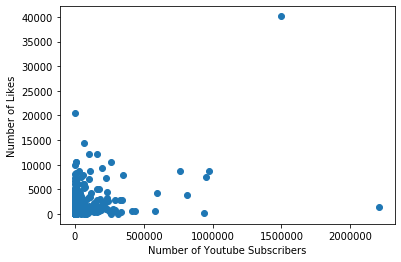

In [38]:
plt.scatter(ytSubscribers['YoutubeSubscribers'],ytSubscribers['likes'])
plt.xlabel("Number of Youtube Subscribers")
plt.ylabel("Number of Likes")
plt.show()

In [39]:
#sns.lmplot(x='YoutubeSubscribers', y='likes', data=ytSubscribers, hue='playbutton', fit_reg=False)

### Community Posts

In [40]:
import seaborn as sns

In [41]:
community = df.loc[~df['communityPosts'].isna(),]

nocommunity = df.loc[df['communityPosts'].isna(),]

print("Community average likes: ",community['likes'].mean())
print("No Community average likes: ",nocommunity['likes'].mean())

print("Num Classes with community: ", community.shape[0])
print("Num Classes without community: ", nocommunity.shape[0])

Community average likes:  2107.899637243047
No Community average likes:  434.4070351758794
Num Classes with community:  3348
Num Classes without community:  818


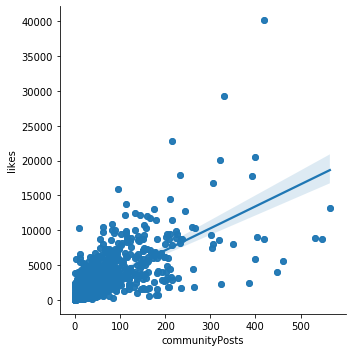

In [42]:
sns.lmplot(x='communityPosts', y='likes', data=community, fit_reg=True)

### Feedback Vs. No Feedback

In [43]:
feedback = df.loc[~df['feedbackNum'].isna()]
nofeedback = df.loc[df['feedbackNum'].isna()]

print("classes with creator feedback: ", feedback['likes'].mean())
print("classes without creator feedback: ", nofeedback['likes'].mean())

classes with creator feedback:  2375.9872773536895
classes without creator feedback:  1642.915611814346


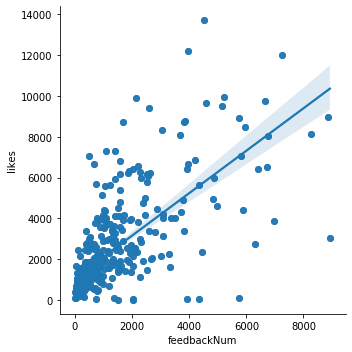

In [44]:
sns.lmplot(x='feedbackNum', y='likes', data=feedback, fit_reg=True)

In [45]:
np.corrcoef(feedback['feedbackNum'], feedback['likes'])

array([[1.        , 0.69163943],
       [0.69163943, 1.        ]])